In [1]:
pip install pandas seaborn matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv("AI_Tools_List.csv", encoding="latin1")


In [4]:
# Quick peek / basic cleaning
print(df.shape)
display(df.head())
display(df.info())
display(df.describe(include="all"))

(40, 7)


AI Name Developer/Company  Release Year           AI Type  \
0     ChatGPT            OpenAI          2022           Chatbot   
1      Claude         Anthropic          2023           Chatbot   
2      Gemini   Google DeepMind          2023           Chatbot   
3     Copilot         Microsoft          2023  Coding Assistant   
4  Midjourney        Midjourney          2022   Image Generator   

     Main Use Case  Popularity Score (1-10)  Estimated_Valuation_Billion_USD  
0  Text Generation                     10.0                             85.0  
1  Text Generation                      8.5                              4.5  
2  Text Generation                      8.5                             15.0  
3  Code Completion                      8.0                              NaN  
4   Art Generation                      9.0                              1.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AI Name                          40 non-null     object 
 1   Developer/Company                40 non-null     object 
 2   Release Year                     40 non-null     int64  
 3   AI Type                          40 non-null     object 
 4   Main Use Case                    40 non-null     object 
 5   Popularity Score (1-10)          40 non-null     float64
 6   Estimated_Valuation_Billion_USD  39 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


None

AI Name Developer/Company  Release Year  AI Type    Main Use Case  \
count        40                40     40.000000       40               40   
unique       40                39           NaN       16               31   
top     ChatGPT            OpenAI           NaN  Chatbot  Text Generation   
freq          1                 2           NaN       11                5   
mean        NaN               NaN   2021.825000      NaN              NaN   
std         NaN               NaN      1.500214      NaN              NaN   
min         NaN               NaN   2017.000000      NaN              NaN   
25%         NaN               NaN   2021.000000      NaN              NaN   
50%         NaN               NaN   2022.000000      NaN              NaN   
75%         NaN               NaN   2023.000000      NaN              NaN   
max         NaN               NaN   2024.000000      NaN              NaN   

        Popularity Score (1-10)  Estimated_Valuation_Billion_USD  
count                 40.000000                        39.000000  
unique                      NaN                              NaN  
top                         NaN                              NaN  
freq                        NaN                              NaN  
mean                   6.950000                         6.412821  
std                    0.966092                        18.971043  
min                    5.500000                         0.100000  
25%                    6.500000                         0.100000  
50%                    6.500000                         0.500000  
75%                    7.500000                         1.625000  
max                   10.000000                        85.000000

In [5]:
# Ensure numeric column is numeric (safe coercion)
df['Estimated_Valuation_Billion_USD'] = pd.to_numeric(df['Estimated_Valuation_Billion_USD'], errors='coerce')
df['Popularity Score (1-10)'] = pd.to_numeric(df['Popularity Score (1-10)'], errors='coerce')

**Bar plot (count of AI tools by AI Type) **

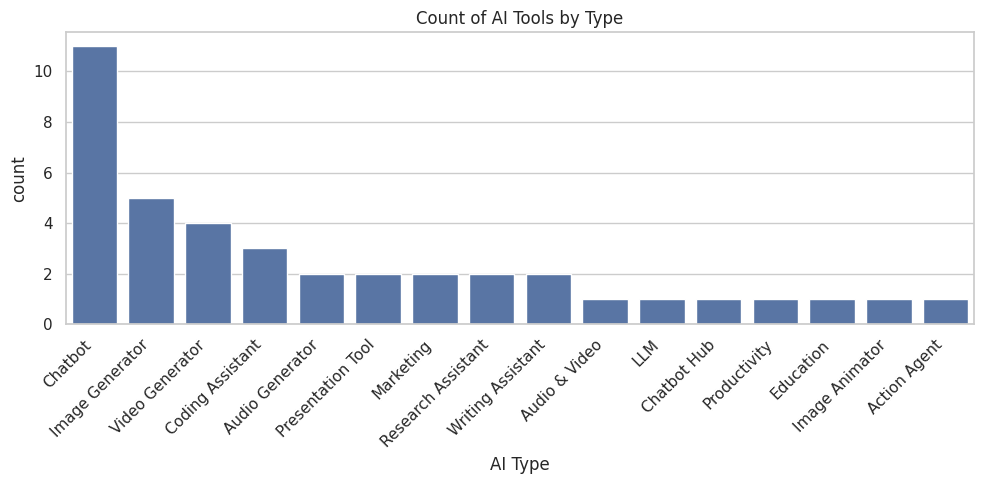

In [22]:
plt.figure(figsize=(10,5))
order = df['AI Type'].value_counts().index
sns.countplot(data=df, x='AI Type', order=order)
plt.title("Count of AI Tools by Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# sns.countplot(data=df, x='AI Type', order=order, color="plasma")
color="viridis"
plt.show()


**Bar plot (mean popularity by AI Type)**

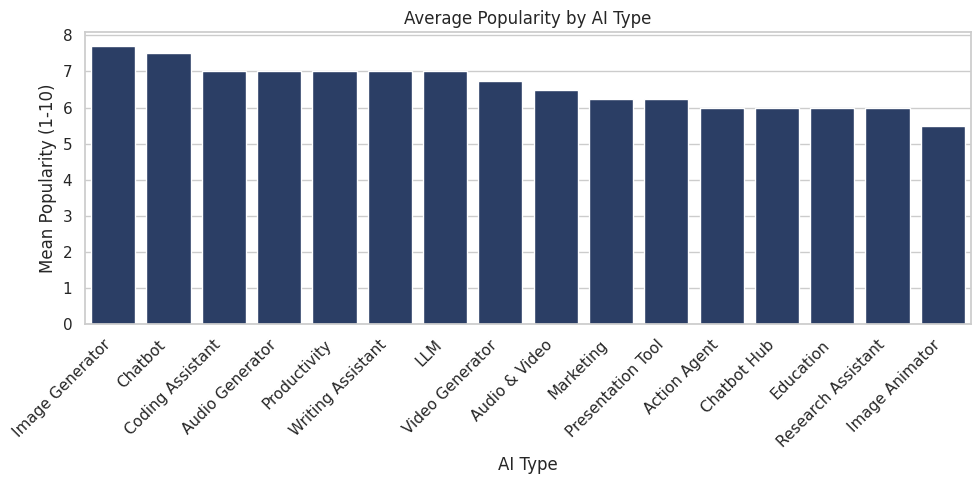

In [27]:
plt.figure(figsize=(10,5))
mean_pop = df.groupby('AI Type')['Popularity Score (1-10)'].mean().sort_values(ascending=False)
sns.barplot(x=mean_pop.index, y=mean_pop.values)
plt.ylabel("Mean Popularity (1-10)")
plt.title("Average Popularity by AI Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
sns.set_palette("cividis")
plt.show()





** Box plot (popularity spread across AI Type)**

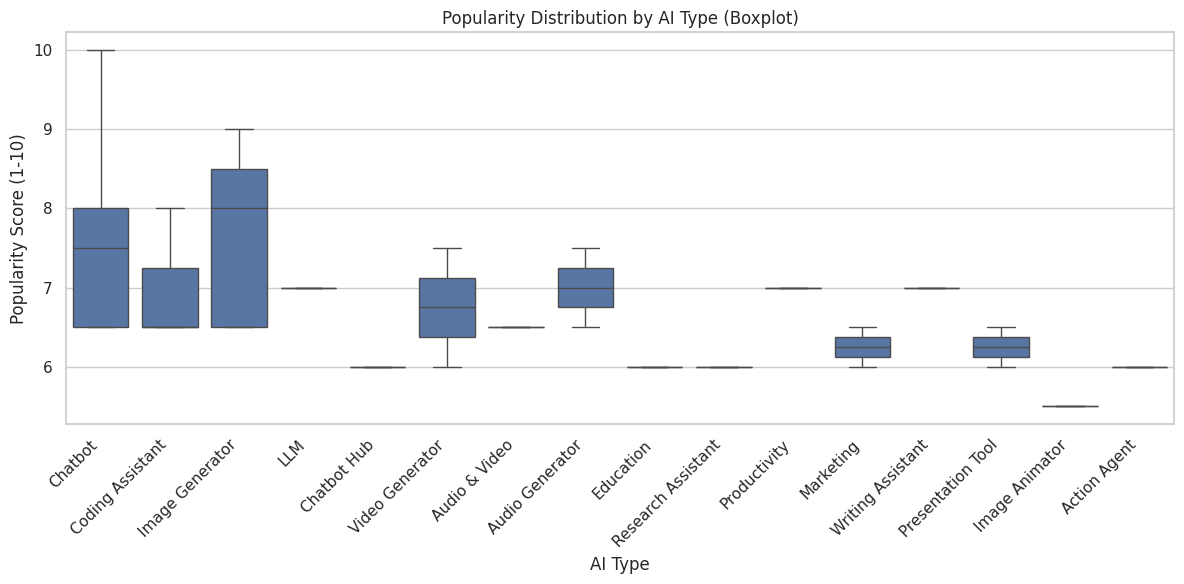

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='AI Type', y='Popularity Score (1-10)')
plt.title("Popularity Distribution by AI Type (Boxplot)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**KDE plot (overall distribution of popularity) + KDE by AI Type**

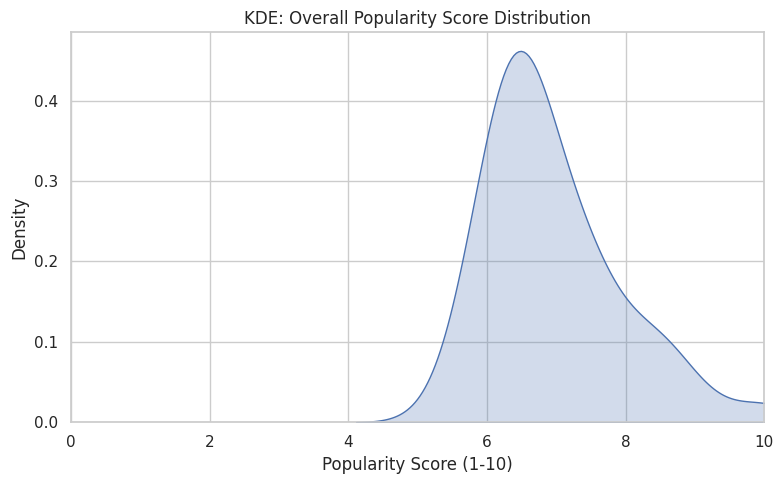

/tmp/ipython-input-2497336726.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset, label=t)
/tmp/ipython-input-2497336726.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset, label=t)


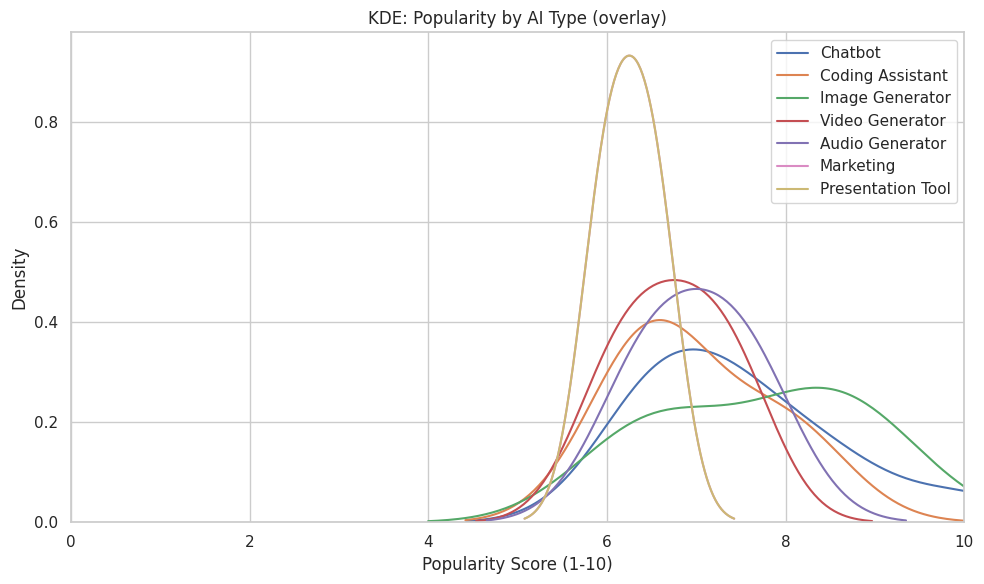

In [9]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Popularity Score (1-10)', fill=True)
plt.title("KDE: Overall Popularity Score Distribution")
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

# KDE by AI Type (overlay) — optional when categories aren't too many
plt.figure(figsize=(10,6))
for t in df['AI Type'].unique():
    subset = df[df['AI Type'] == t]['Popularity Score (1-10)'].dropna()
    if len(subset) > 1:   # skip tiny groups
        sns.kdeplot(subset, label=t)
plt.title("KDE: Popularity by AI Type (overlay)")
plt.xlim(0, 10)
plt.legend()
plt.tight_layout()
plt.show()


**Violin plot (popularity by Release Year)**

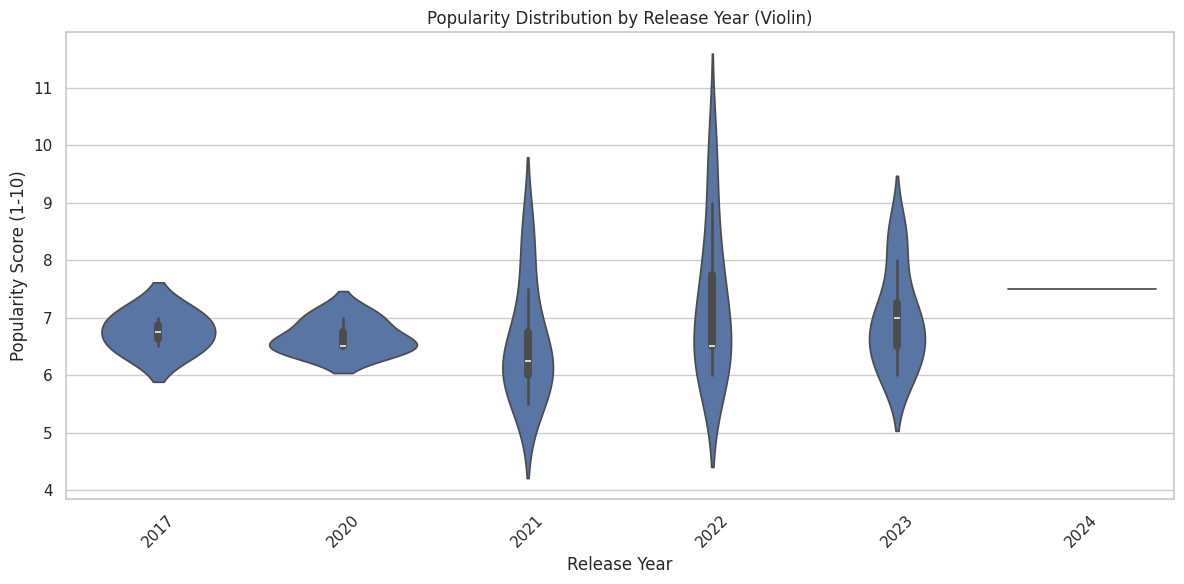

In [10]:
plt.figure(figsize=(12,6))
years_order = sorted(df['Release Year'].dropna().unique())
sns.violinplot(data=df, x='Release Year', y='Popularity Score (1-10)', order=years_order)
plt.title("Popularity Distribution by Release Year (Violin)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Swarm (or strip) plot — exact points of valuation by AI Type**

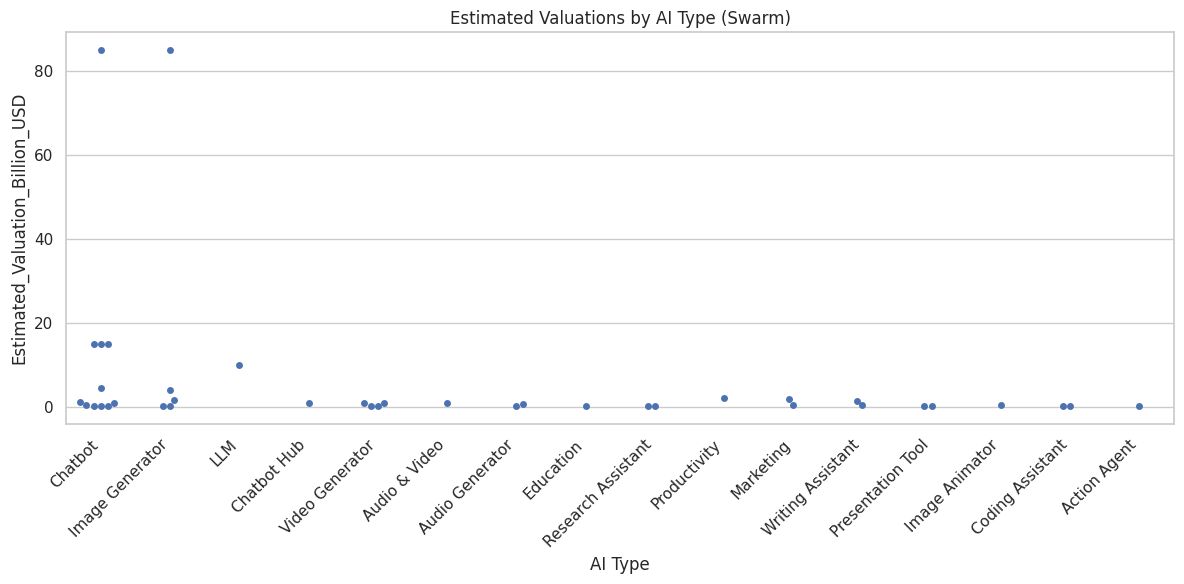

In [11]:
plt.figure(figsize=(12,6))
# drop NaN valuations for this plot
df_val = df.dropna(subset=['Estimated_Valuation_Billion_USD'])
# Swarm can be slow if many points — for ~40 rows it's fine. Otherwise use stripplot(jitter=True).
sns.swarmplot(data=df_val, x='AI Type', y='Estimated_Valuation_Billion_USD')
plt.title("Estimated Valuations by AI Type (Swarm)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**log scale for the y-axis**

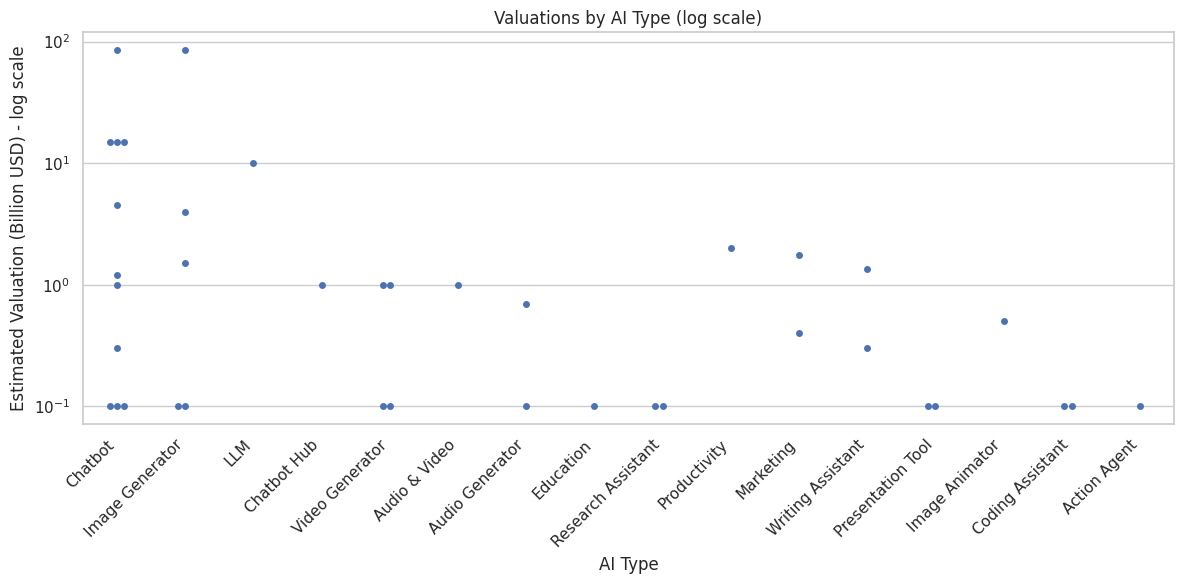

In [12]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=df_val, x='AI Type', y='Estimated_Valuation_Billion_USD')
plt.yscale('log')
plt.ylabel("Estimated Valuation (Billion USD) - log scale")
plt.title("Valuations by AI Type (log scale)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Scatter: Popularity vs Valuation (with labels and trendline)**

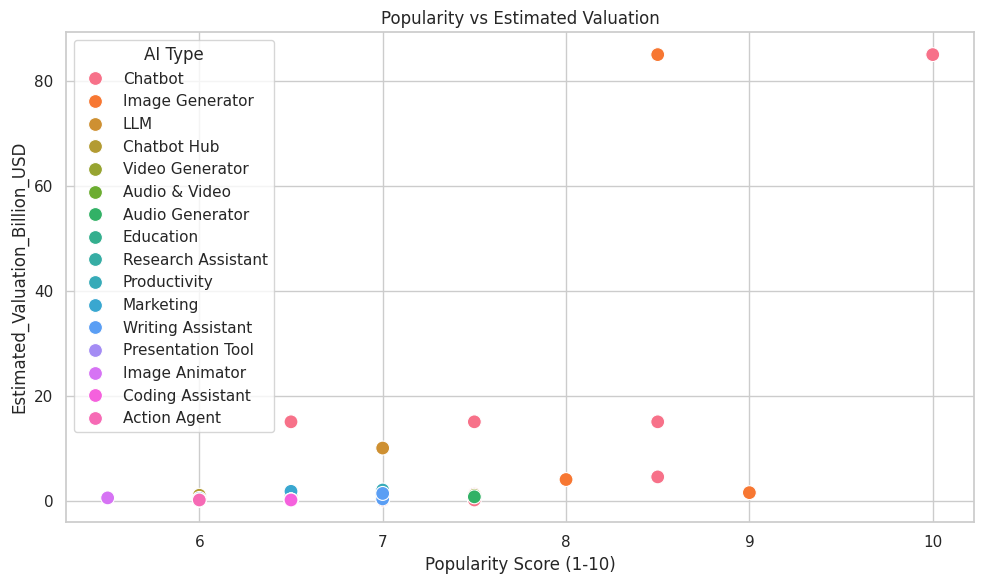

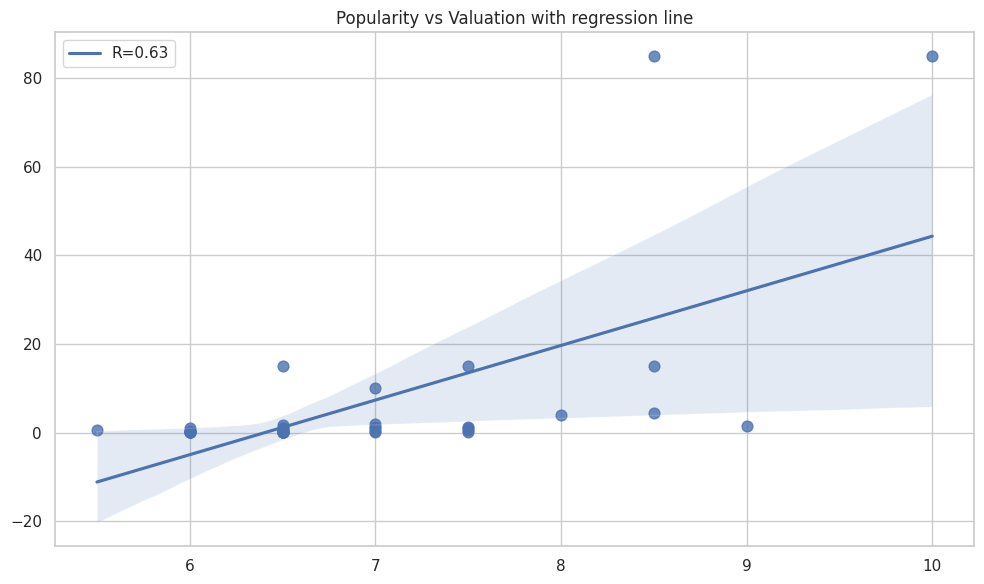

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_val, x='Popularity Score (1-10)', y='Estimated_Valuation_Billion_USD', hue='AI Type', s=100)
plt.title("Popularity vs Estimated Valuation")
plt.tight_layout()
plt.show()

# Optional: add linear regression fit (on raw or log valuations)
import numpy as np
from scipy.stats import linregress
x = df_val['Popularity Score (1-10)'].values
y = df_val['Estimated_Valuation_Billion_USD'].values
mask = ~np.isnan(x) & ~np.isnan(y)
if mask.sum() > 2:
    slope, intercept, r, p, se = linregress(x[mask], y[mask])
    xs = np.linspace(min(x[mask]), max(x[mask]), 100)
    plt.figure(figsize=(10,6))
    sns.regplot(x=x, y=y, scatter_kws={'s':60}, line_kws={'label':f'R={r:.2f}'})
    plt.title("Popularity vs Valuation with regression line")
    plt.legend()
    plt.tight_layout()
    plt.show()


**Correlation heatmap (numeric columns)**

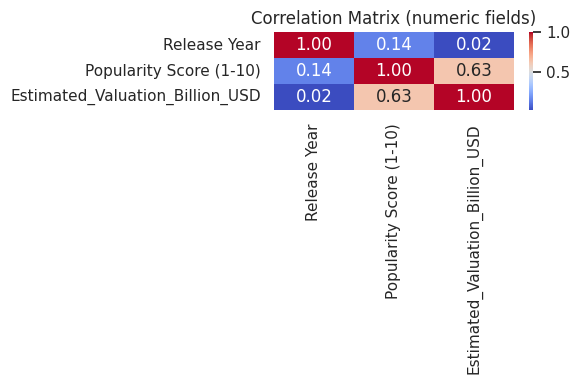

In [14]:
plt.figure(figsize=(6,4))
num_cols = ['Release Year', 'Popularity Score (1-10)', 'Estimated_Valuation_Billion_USD']
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (numeric fields)")
plt.tight_layout()
plt.show()


**Pairplot (quick multi-plot of numeric relationships)**

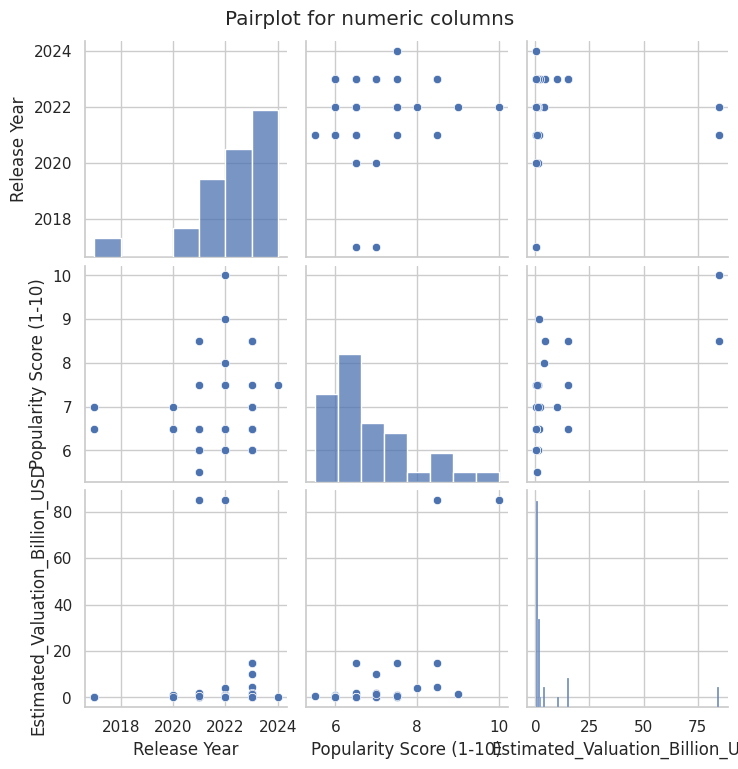

In [15]:
sns.pairplot(df[num_cols].dropna())
plt.suptitle("Pairplot for numeric columns", y=1.02)
plt.show()


**Save figures (example)**

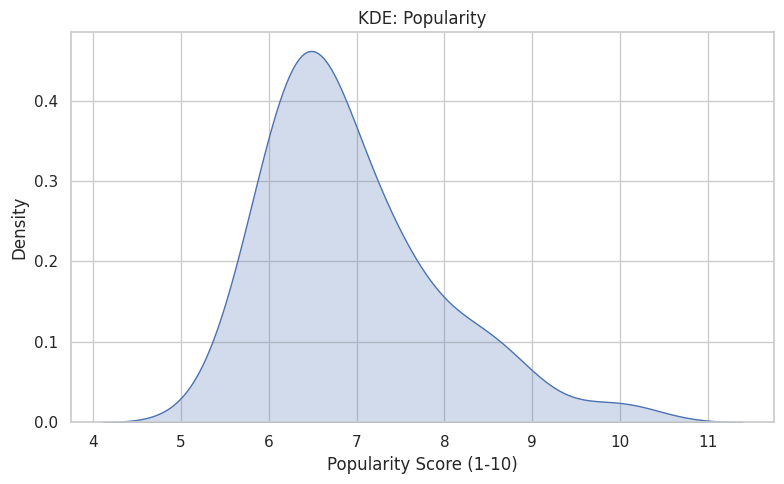

In [16]:
# after creating a figure, save it:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Popularity Score (1-10)', fill=True)
plt.title("KDE: Popularity")
plt.tight_layout()
plt.savefig("kde_popularity.png", dpi=150, bbox_inches='tight')
plt.show()


--- Using Palette: Set2 ---


/tmp/ipython-input-1440151959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


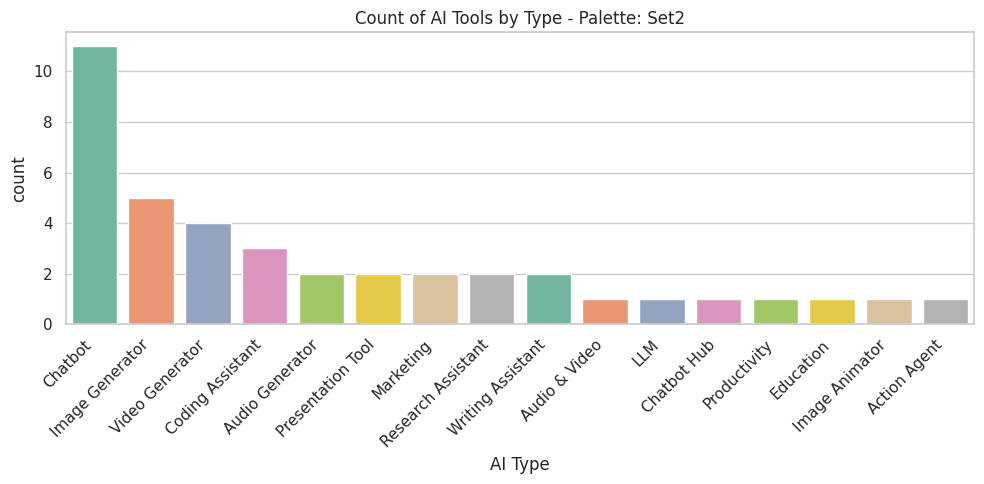

--- Using Palette: husl ---


/tmp/ipython-input-1440151959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


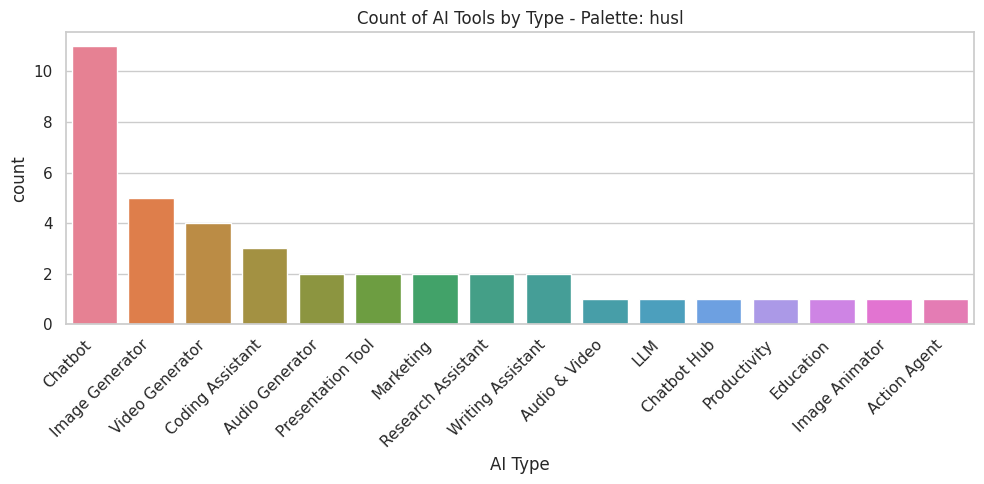

--- Using Palette: coolwarm ---


/tmp/ipython-input-1440151959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


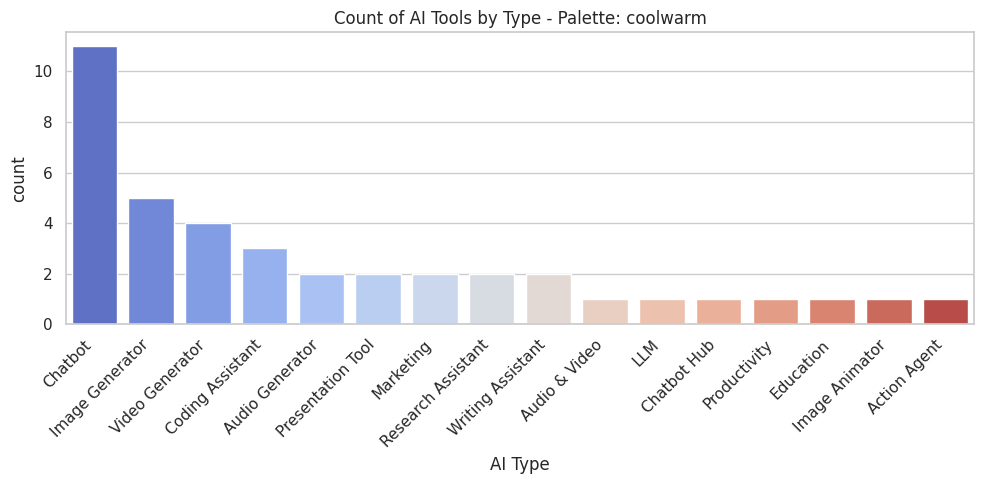

--- Using Palette: viridis ---


/tmp/ipython-input-1440151959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


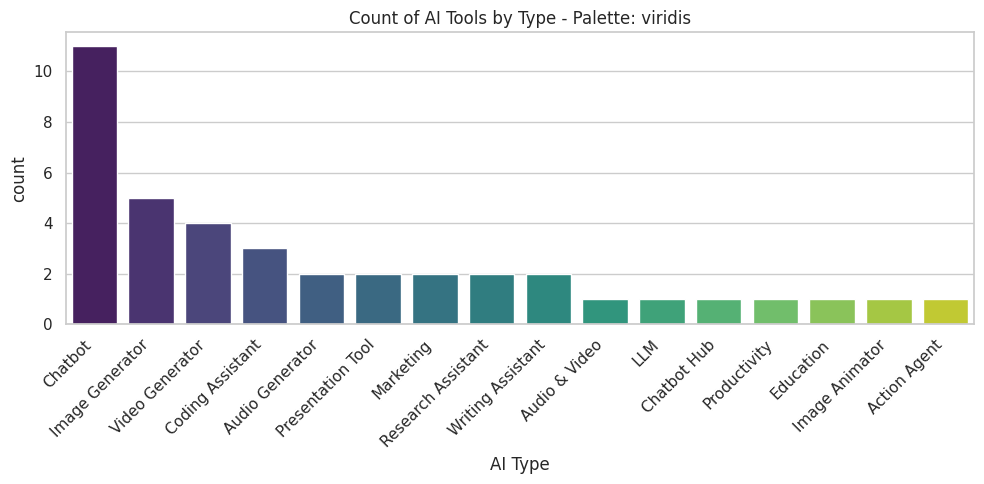

--- Using Palette: plasma ---


/tmp/ipython-input-1440151959.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


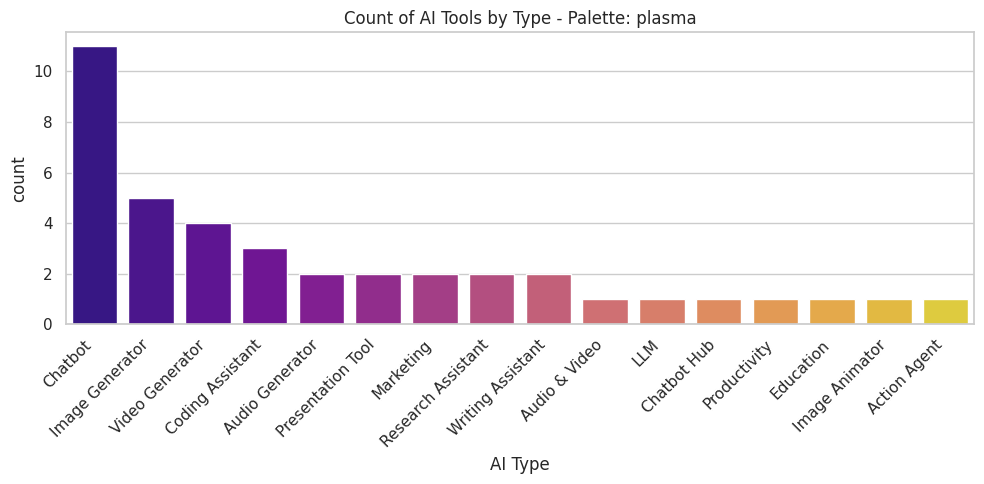

In [28]:
# Define palettes to try
palettes = ["Set2", "husl", "coolwarm", "viridis", "plasma"]

for p in palettes:
    print(f"--- Using Palette: {p} ---")

    # 1. Count Plot (Number of tools by type)
    plt.figure(figsize=(10,5))
    order = df['AI Type'].value_counts().index
    sns.countplot(data=df, x="AI Type", order=order, palette=p)
    plt.title(f"Count of AI Tools by Type - Palette: {p}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


--- Using Palette: Set2 ---


/tmp/ipython-input-3018761979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


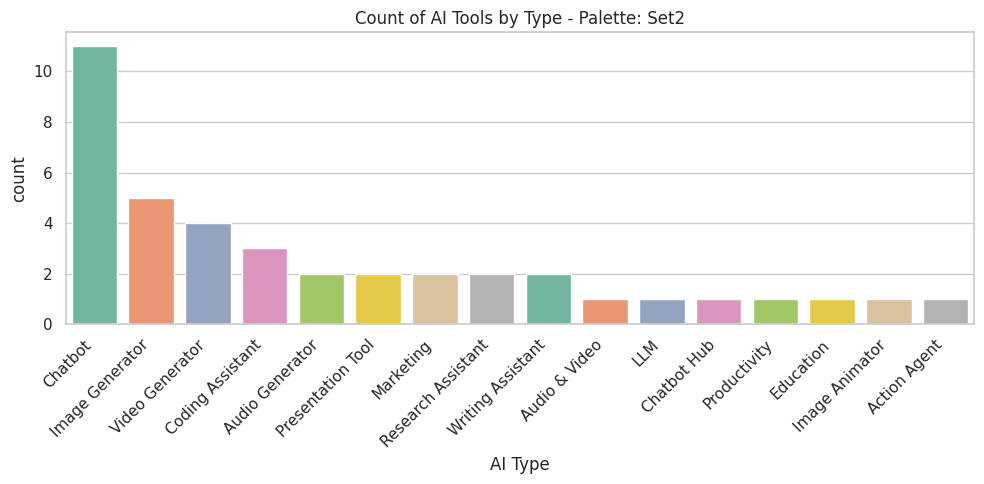

/tmp/ipython-input-3018761979.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)


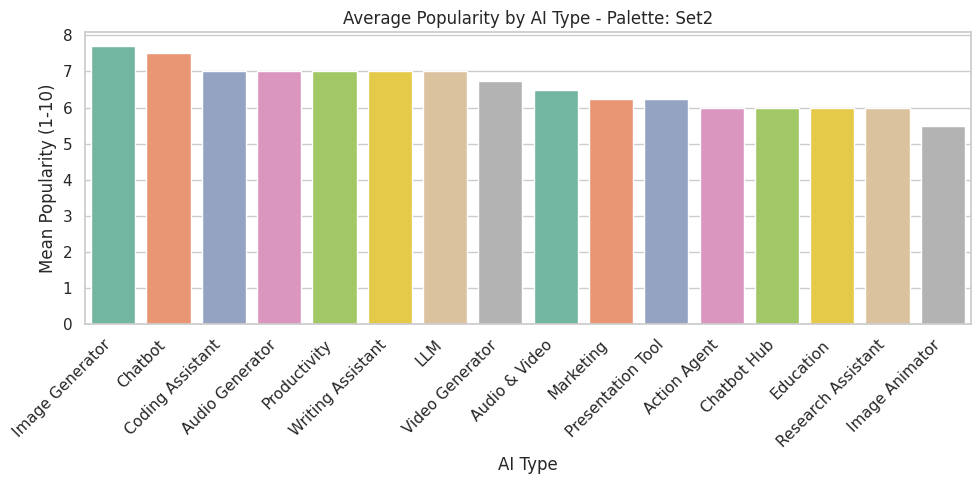

/tmp/ipython-input-3018761979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


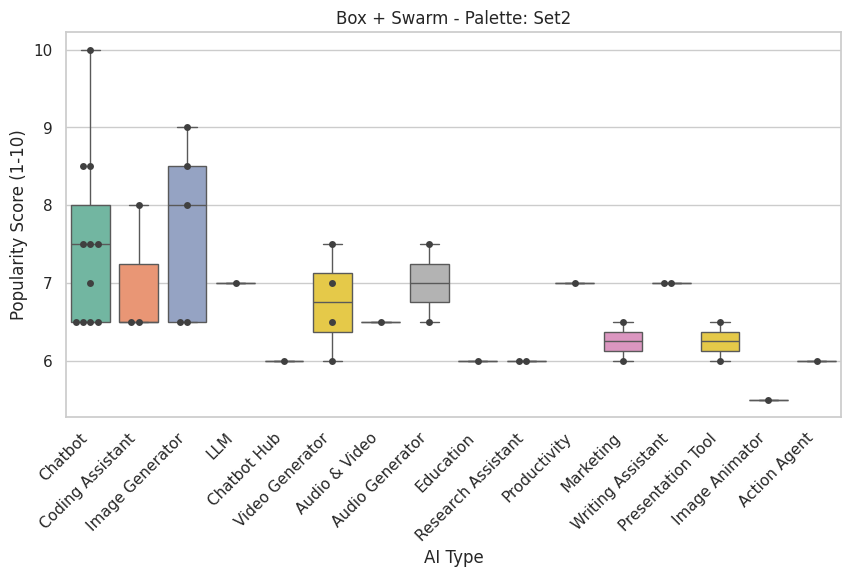

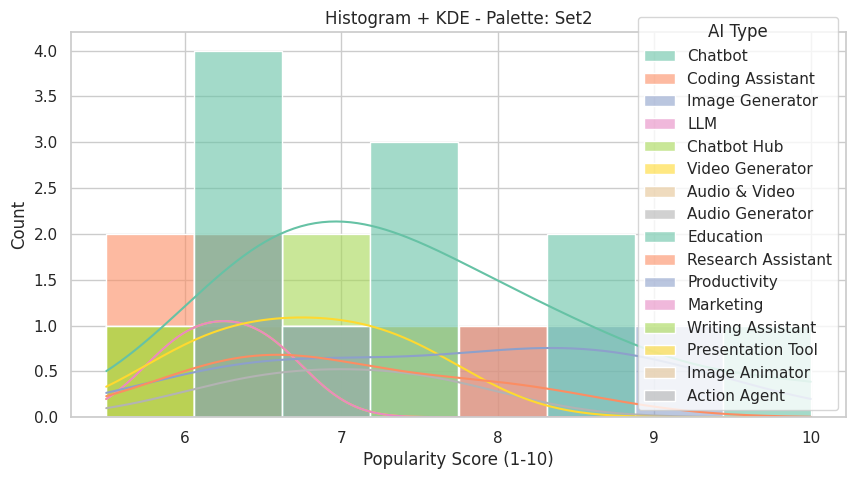

/tmp/ipython-input-3018761979.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


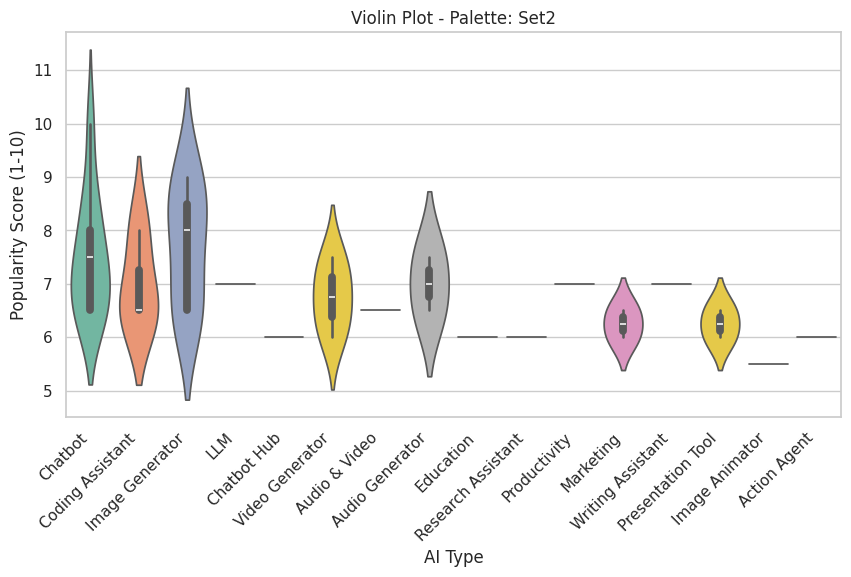

--- Using Palette: husl ---


/tmp/ipython-input-3018761979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


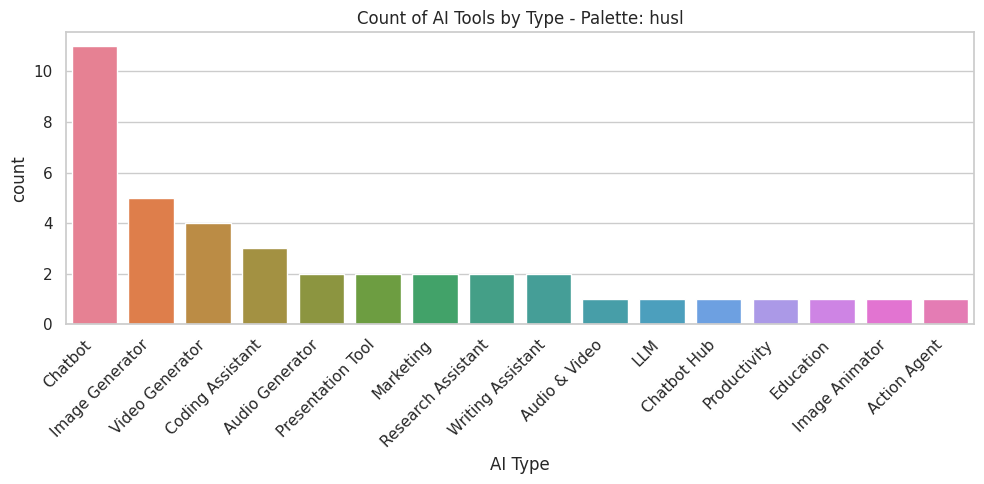

/tmp/ipython-input-3018761979.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)


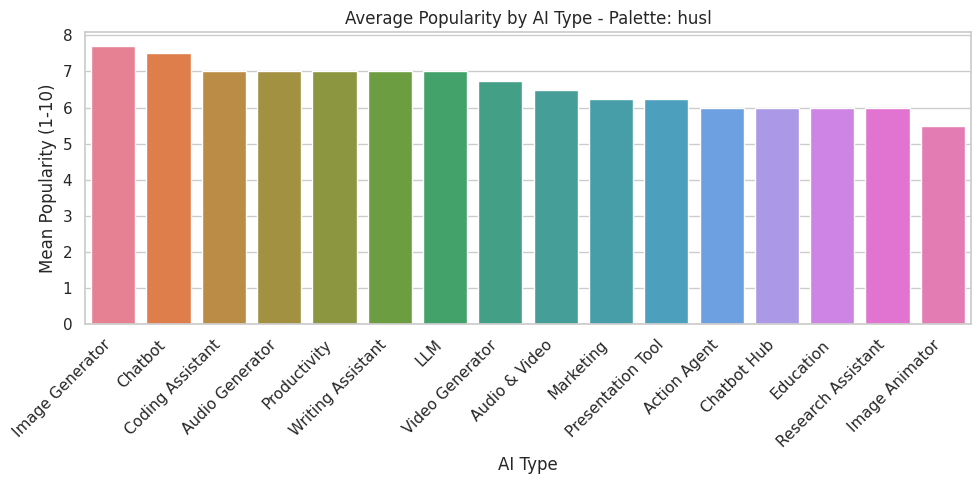

/tmp/ipython-input-3018761979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


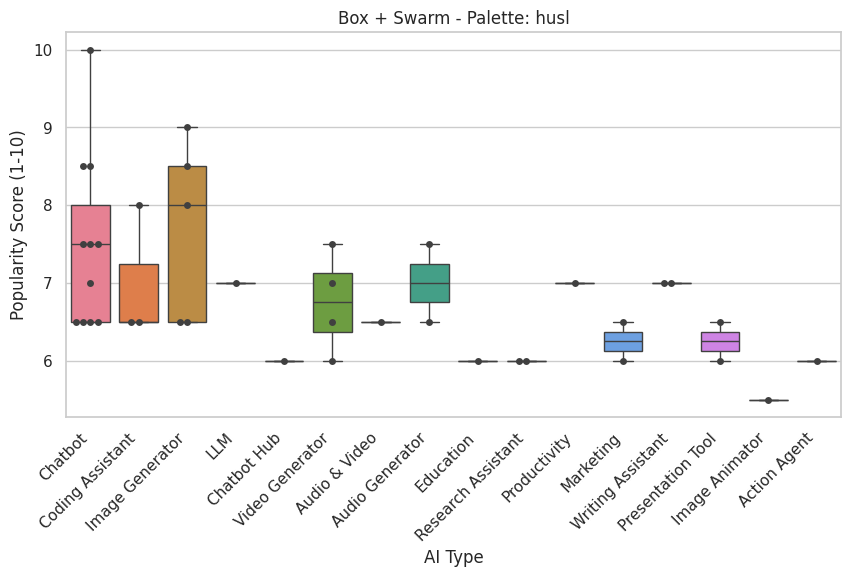

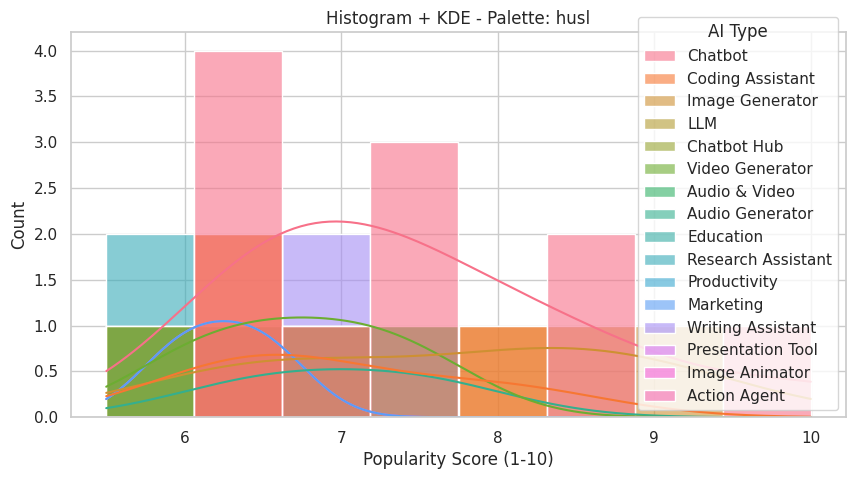

/tmp/ipython-input-3018761979.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


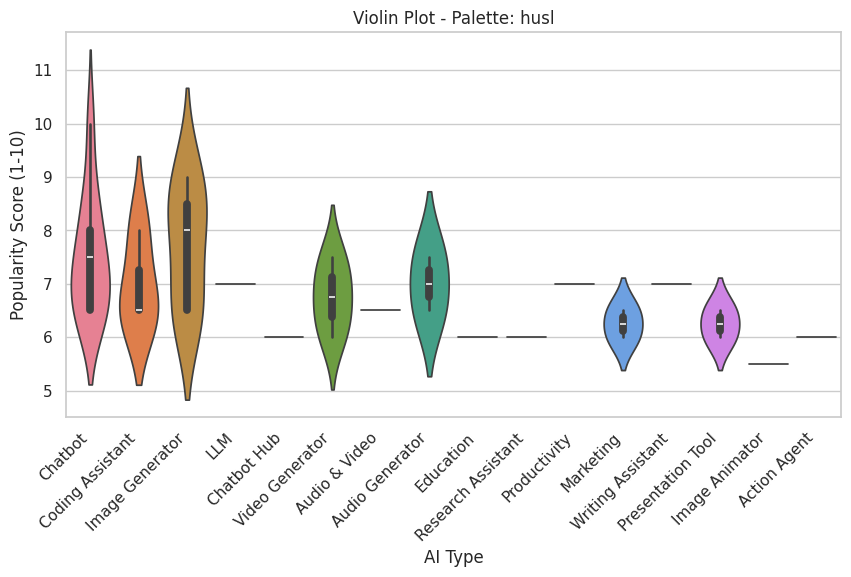

--- Using Palette: coolwarm ---


/tmp/ipython-input-3018761979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


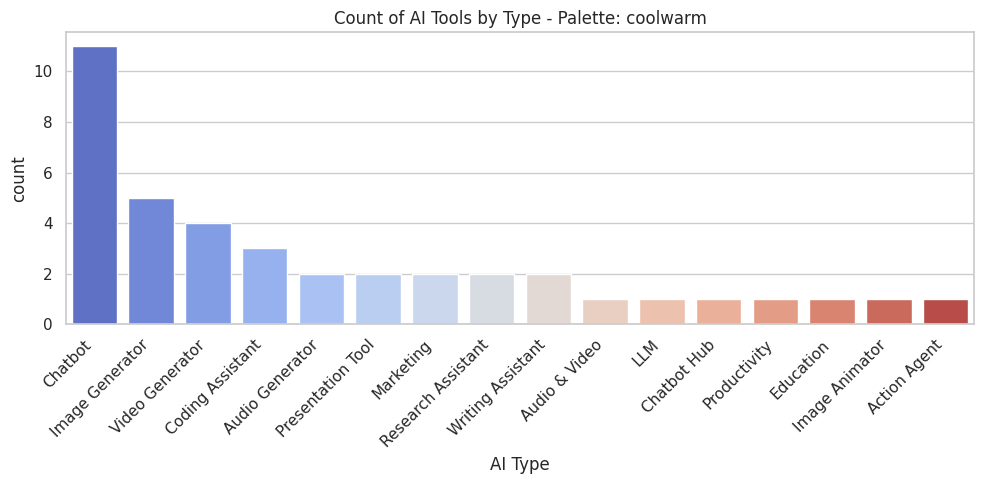

/tmp/ipython-input-3018761979.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)


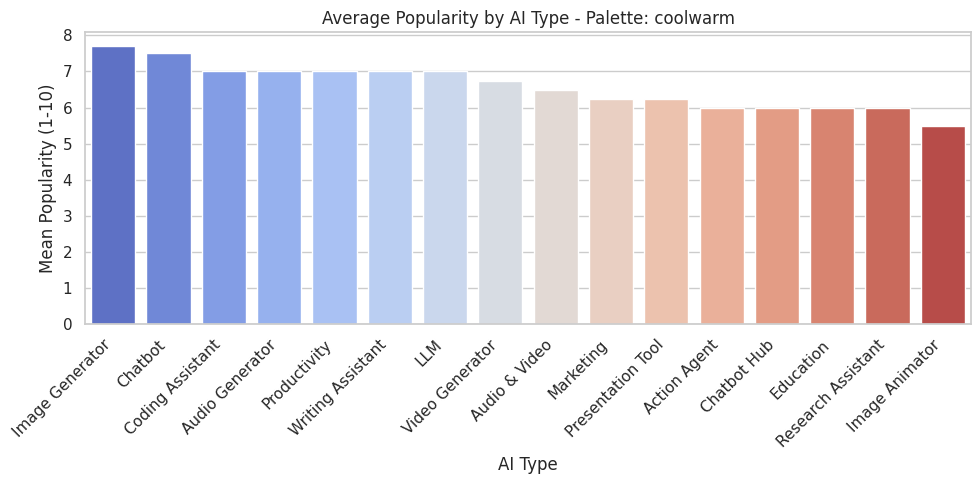

/tmp/ipython-input-3018761979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


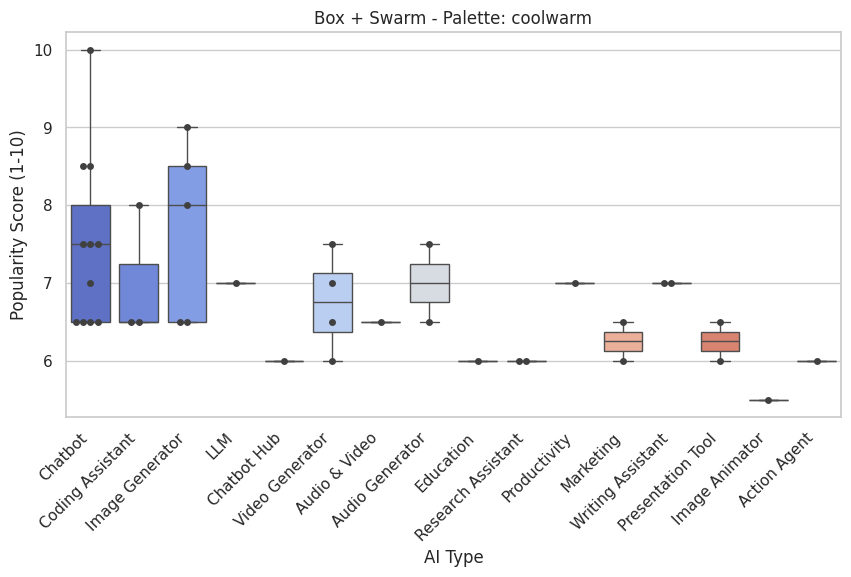

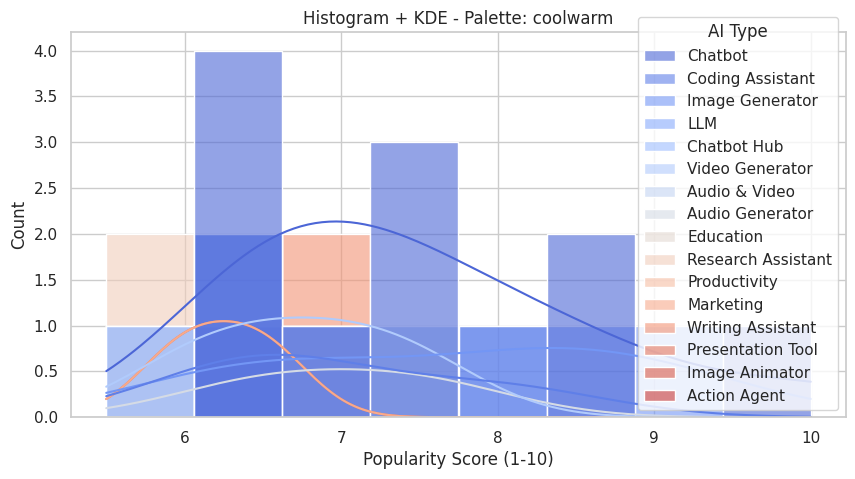

/tmp/ipython-input-3018761979.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


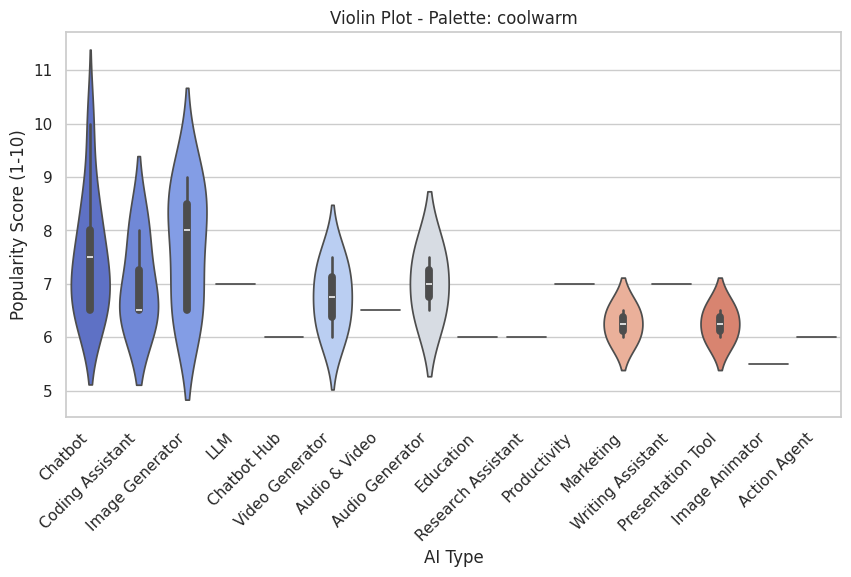

--- Using Palette: viridis ---


/tmp/ipython-input-3018761979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


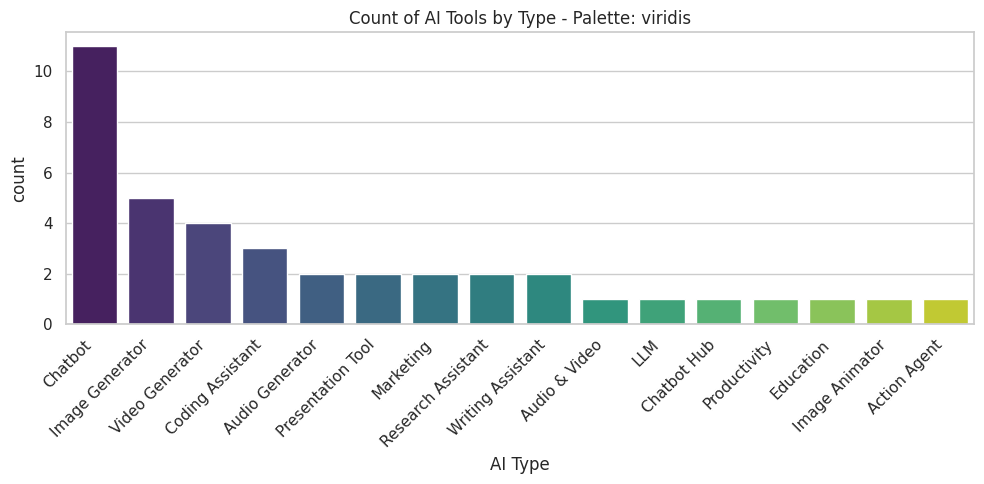

/tmp/ipython-input-3018761979.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)


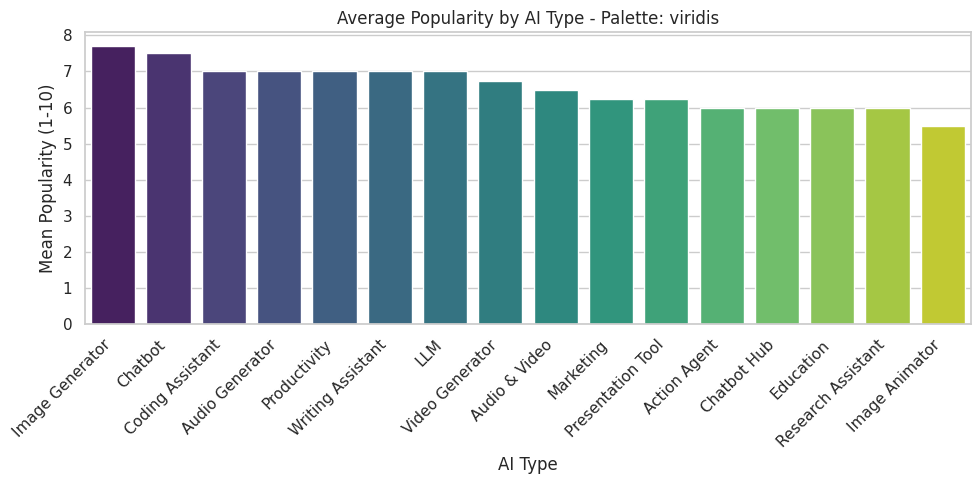

/tmp/ipython-input-3018761979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


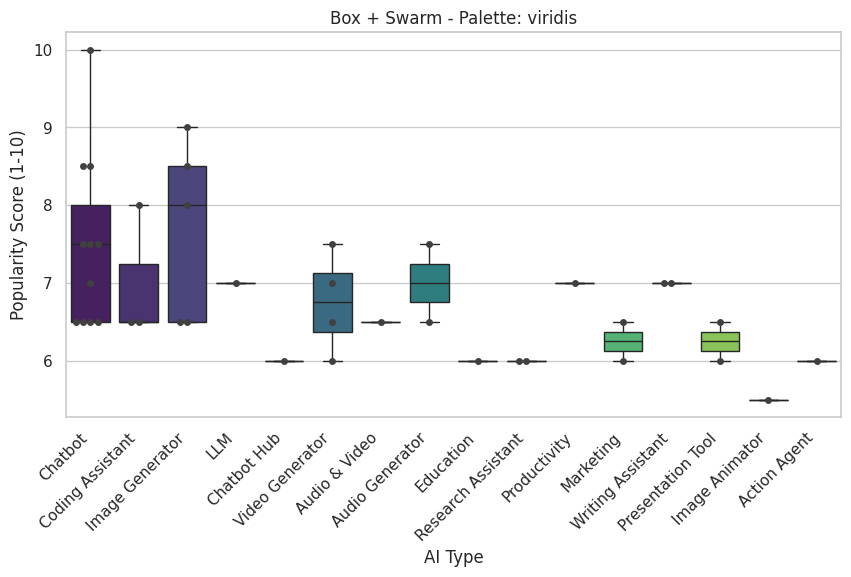

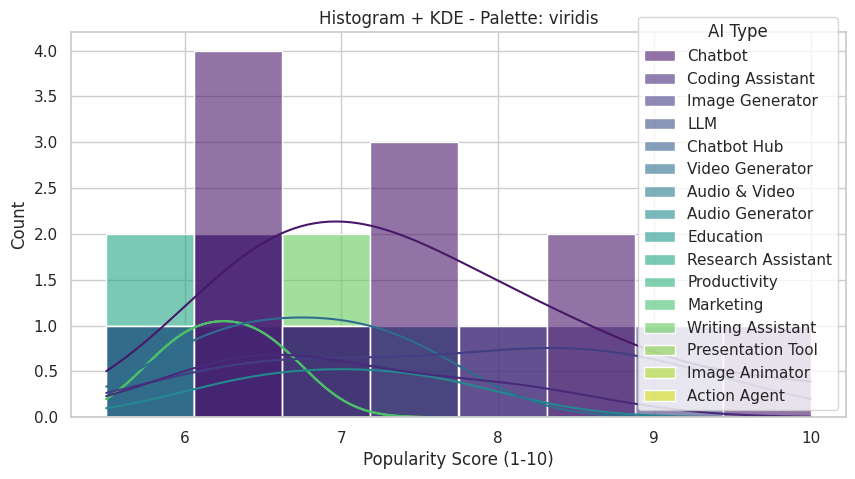

/tmp/ipython-input-3018761979.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


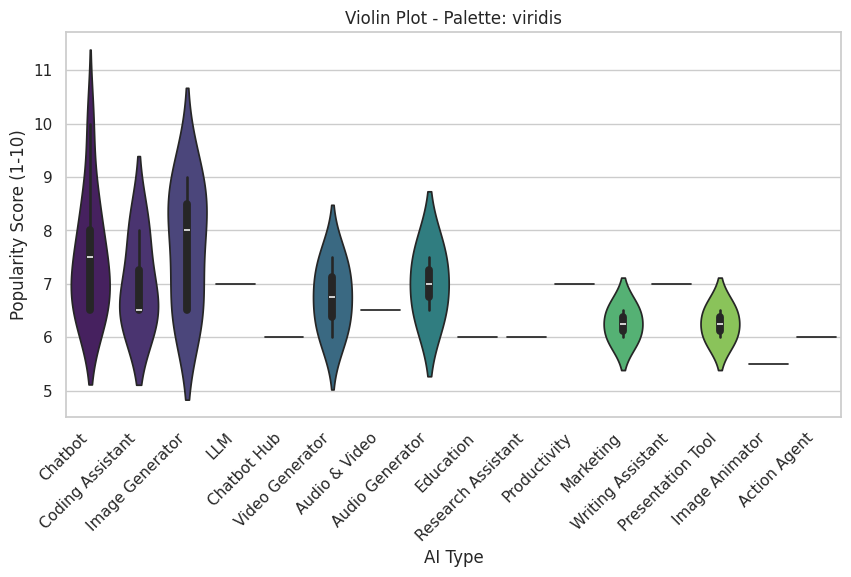

--- Using Palette: plasma ---


/tmp/ipython-input-3018761979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


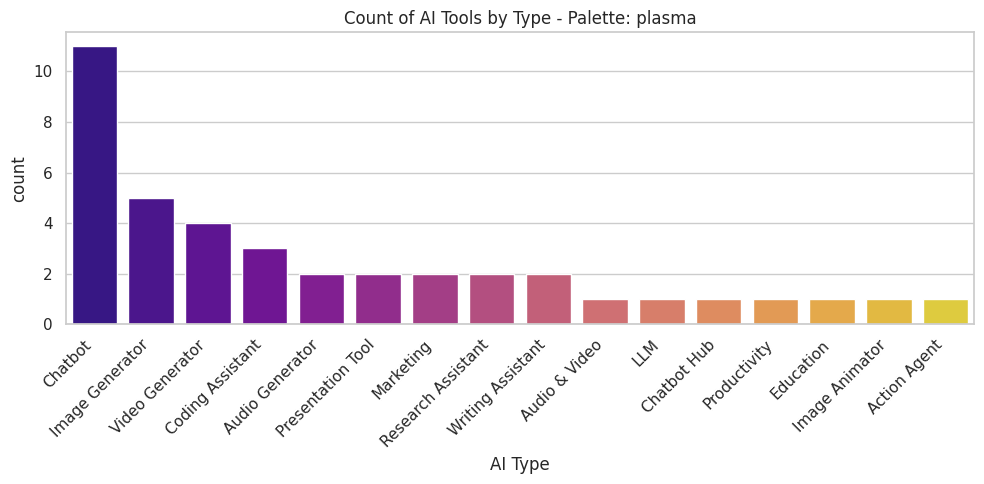

/tmp/ipython-input-3018761979.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)


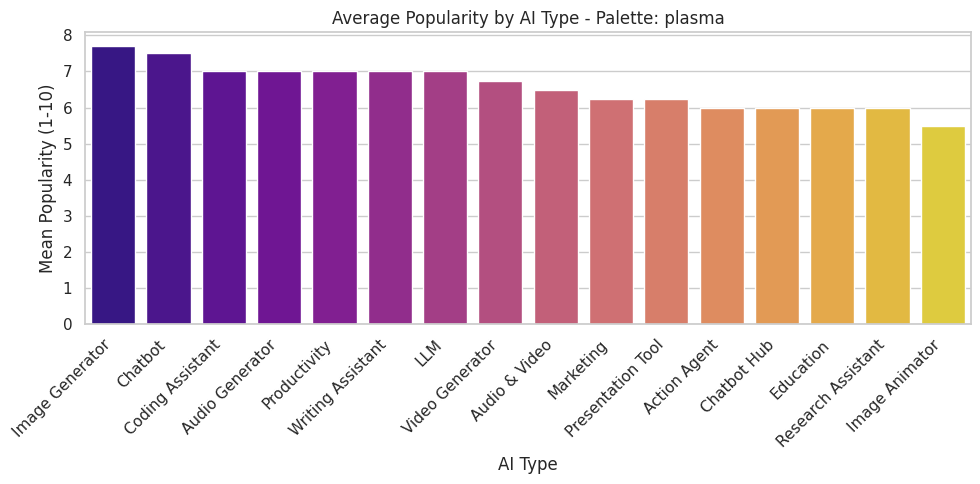

/tmp/ipython-input-3018761979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


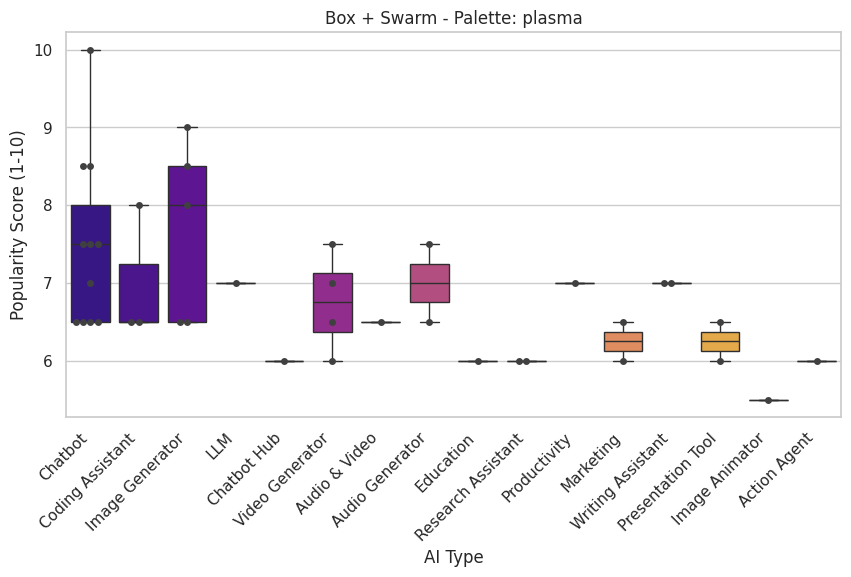

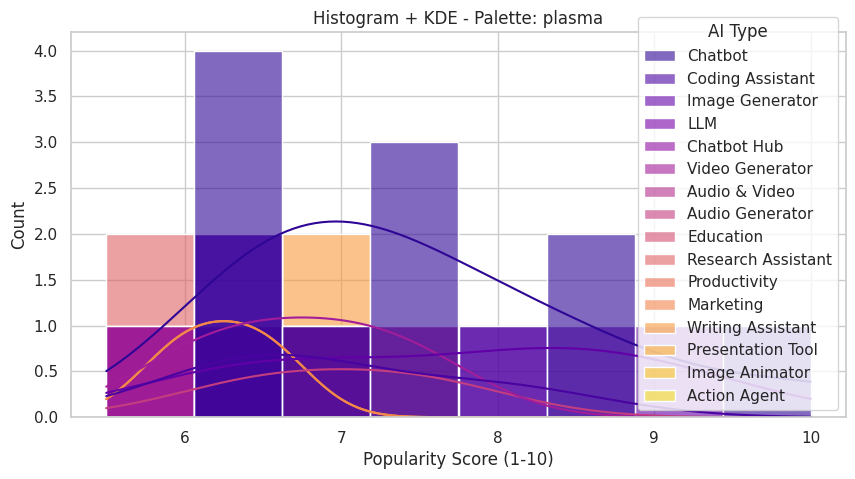

/tmp/ipython-input-3018761979.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


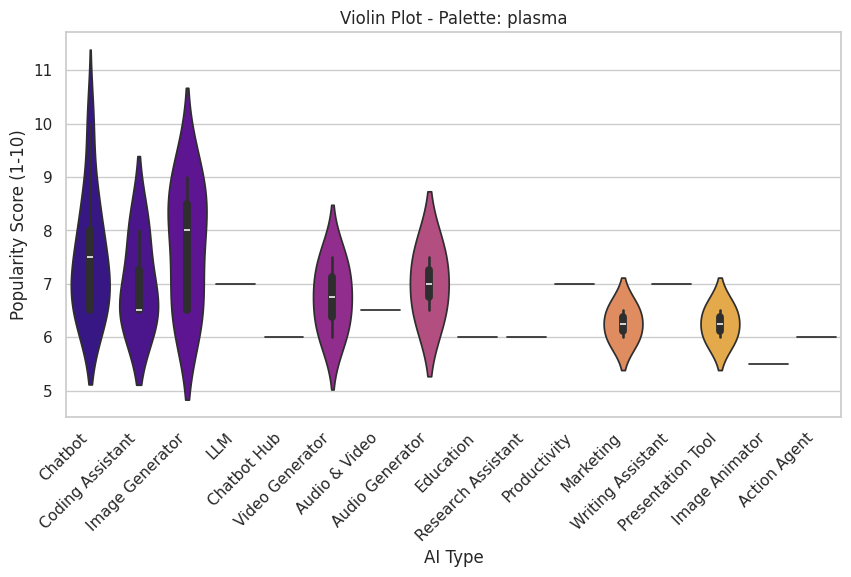

In [32]:
# Define palettes to try
palettes = ["Set2", "husl", "coolwarm", "viridis", "plasma"]

for p in palettes:
    print(f"--- Using Palette: {p} ---")

    # 1. Count Plot (Number of tools by type)
    plt.figure(figsize=(10,5))
    order = df['AI Type'].value_counts().index
    sns.countplot(data=df, x="AI Type", order=order, palette=p)
    plt.title(f"Count of AI Tools by Type - Palette: {p}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # 2. Bar Plot (Mean popularity per AI type)
    plt.figure(figsize=(10,5))
    mean_pop = df.groupby("AI Type")["Popularity Score (1-10)"].mean().sort_values(ascending=False)
    sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)
    plt.ylabel("Mean Popularity (1-10)")
    plt.title(f"Average Popularity by AI Type - Palette: {p}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # 3. Box + Swarm Plot
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)
    sns.swarmplot(data=df, x="AI Type", y="Popularity Score (1-10)", color="0.25")
    plt.title(f"Box + Swarm - Palette: {p}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    # 4. Histogram + KDE
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x="Popularity Score (1-10)", hue="AI Type", kde=True,
                 palette=p, alpha=0.6)
    plt.title(f"Histogram + KDE - Palette: {p}")
    plt.show()

    # 5. Violin Plot
    plt.figure(figsize=(10,5))
    sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)
    plt.title(f"Violin Plot - Palette: {p}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

/tmp/ipython-input-362844092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="AI Type", order=order, palette=p)


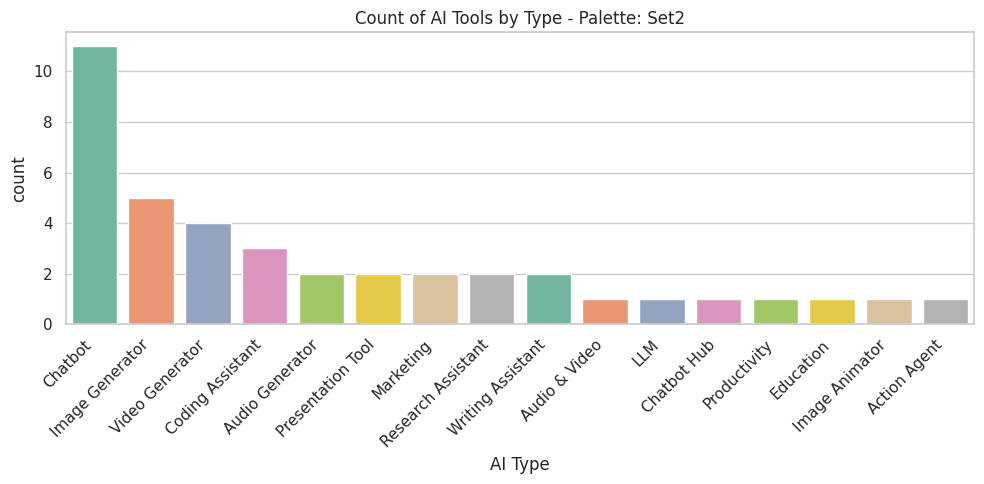

In [33]:
# Example: choose a palette
p = "Set2"

# 1. Count Plot (Number of tools by type)
plt.figure(figsize=(10,5))
order = df['AI Type'].value_counts().index
sns.countplot(data=df, x="AI Type", order=order, palette=p)
plt.title(f"Count of AI Tools by Type - Palette: {p}")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/tmp/ipython-input-448112695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)


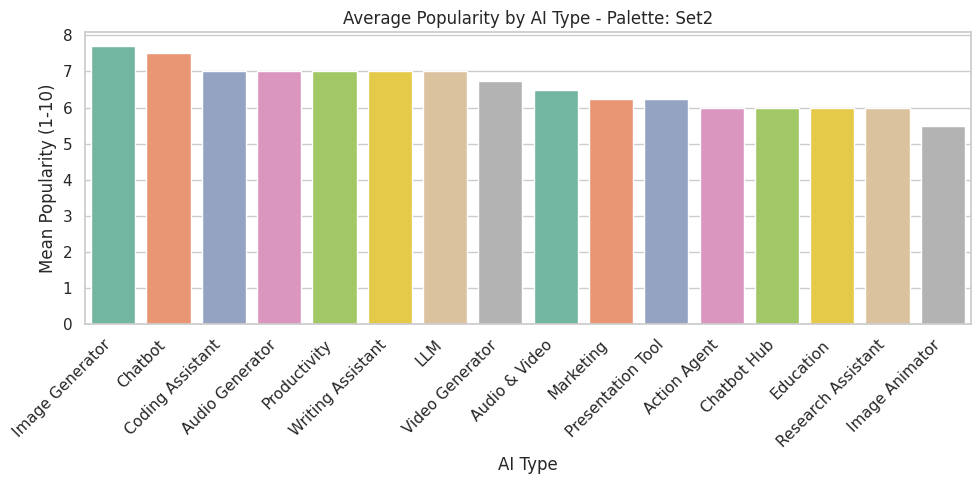

In [34]:
# 2. Bar Plot (Mean popularity per AI type)
plt.figure(figsize=(10,5))
mean_pop = df.groupby("AI Type")["Popularity Score (1-10)"].mean().sort_values(ascending=False)
sns.barplot(x=mean_pop.index, y=mean_pop.values, palette=p)
plt.ylabel("Mean Popularity (1-10)")
plt.title(f"Average Popularity by AI Type - Palette: {p}")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2355187950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


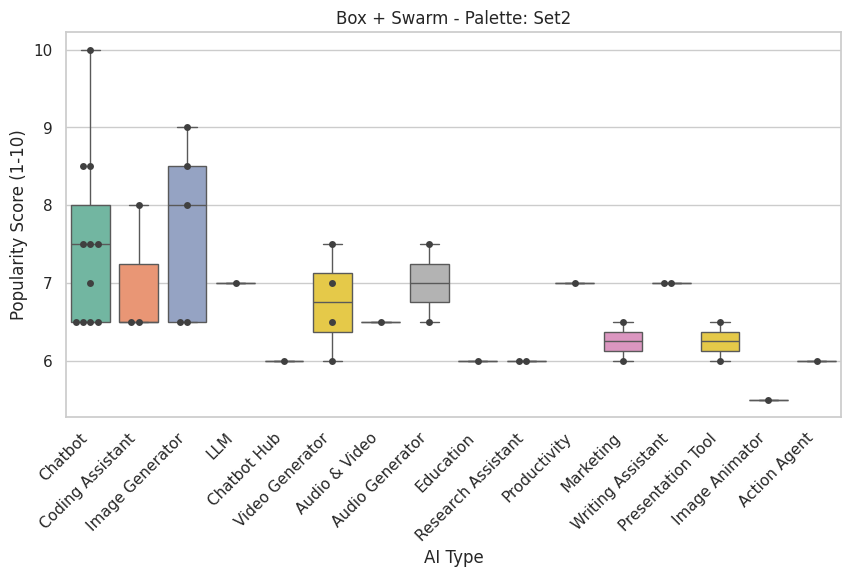

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)
sns.swarmplot(data=df, x="AI Type", y="Popularity Score (1-10)", color="0.25")
plt.title(f"Box + Swarm - Palette: {p}")
plt.xticks(rotation=45, ha="right")
plt.show()


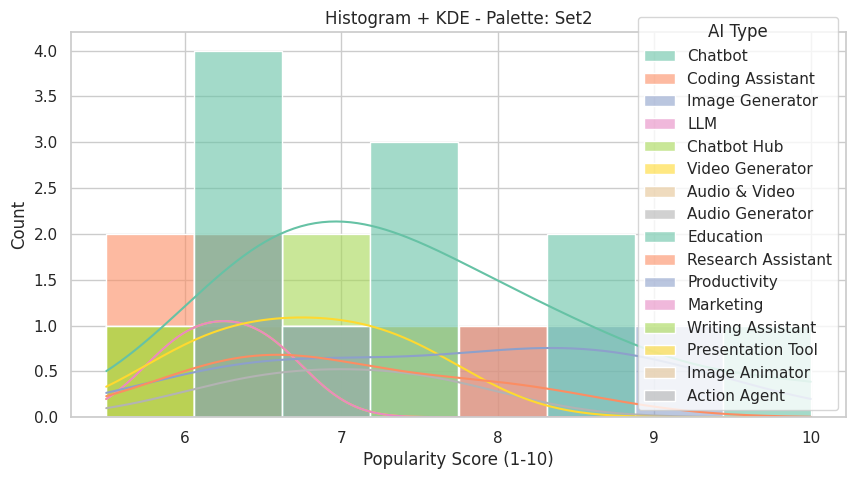

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Popularity Score (1-10)", hue="AI Type", kde=True,
             palette=p, alpha=0.6)
plt.title(f"Histogram + KDE - Palette: {p}")
plt.show()


/tmp/ipython-input-2657671647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)


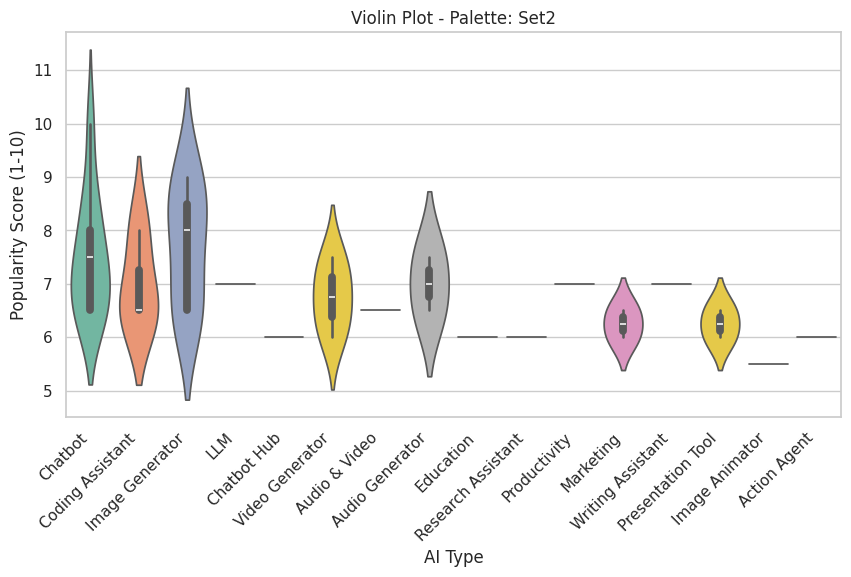

In [37]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="AI Type", y="Popularity Score (1-10)", palette=p)
plt.title(f"Violin Plot - Palette: {p}")
plt.xticks(rotation=45, ha="right")
plt.show()
